In [ ]:
#@title
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yash161101/even-more-fruitssssss

In [ ]:
!unzip \*.zip

In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten,GlobalAveragePooling2D,BatchNormalization,Conv2D
from tensorflow.keras.applications import MobileNetV2,DenseNet121,ResNet101,NASNetMobile
from tensorflow.keras.utils import to_categorical
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2

In [ ]:
Image_shape = (224,224)
model = MobileNetV2(input_shape= Image_shape+(3,), include_top=False, weights='imagenet')

In [ ]:
for layer in model.layers[:]:
  layer.trainable = False

In [ ]:
model.summary()

In [ ]:
data_dir = '/content/results'

path = data_dir
data_dir  = os.path.join(os.path.dirname(path), '/content/results')
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

In [ ]:
images_dict ={
'Apple' : list(data_dir.glob('train/Apple/*/')),
'Banana' : list(data_dir.glob('train/Banana/*/')),
'Cherry' : list(data_dir.glob('train/Cherry/*/')),
'DragonFruit' : list(data_dir.glob('train/Dragon Fruit/*/')),
'Mango' : list(data_dir.glob('train/Mango/*/')),
'Orange' : list(data_dir.glob('train/Orange/*/')),
'Papaya' : list(data_dir.glob('train/Papaya/*/')),
'Pineapple' : list(data_dir.glob('train/Pineapple/*/')) }


In [ ]:
images_dict['Apple']

In [ ]:
a=list(data_dir.glob('train/Apple/*/'))
b=list(data_dir.glob('train/Cherry/*/'))
Image.open(str(b[7]))
#Image.open(str(a[5]))

In [ ]:
len(list(data_dir.glob('train/Apple/*')))   #95
len(list(data_dir.glob('test/Apple/*')))    #13

In [ ]:
labels_dict={
    'Apple': 0,
    'Banana': 1,
    'Cherry': 2,
    'DragonFruit':3,
    'Mango':4,
    'Orange':5,
    'Papaya':6,
    'Pineapple':7
}

In [ ]:
X , y = [] , []

for name , images in images_dict.items():
  for image in images:
    img= cv2.imread(str(image))
    if(img is None):    # dataset contains .gif files   resize did not work
      continue
    else:
      resized_img = cv2.resize(img, Image_shape)
    X.append(resized_img)
    y.append(labels_dict[name])

In [ ]:
X= np.array(X)
y= np.array(y)

In [ ]:
X_train = X/255
#X_train

In [ ]:
y_train = to_categorical(y,8)

In [ ]:
new_model = Sequential([ 
    model,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.50),
    Dense(128,activation='relu'),
    Dropout(0.25),
    Dense(8,activation='softmax')
])

In [ ]:
new_model.summary()

In [ ]:
y_train[600]

In [ ]:
new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
results=new_model.fit(X_train,y_train,epochs=30)

In [ ]:
images_test_dict ={
'Apple' : list(data_dir.glob('test/Apple/*/')),
'Banana' : list(data_dir.glob('test/Banana/*/')),
'Cherry' : list(data_dir.glob('test/Cherry/*/')),
'DragonFruit' : list(data_dir.glob('test/Dragon Fruit/*/')),
'Mango' : list(data_dir.glob('test/Mango/*/')),
'Orange' : list(data_dir.glob('test/Orange/*/')),
'Papaya' : list(data_dir.glob('test/Papaya/*/')),
'Pineapple' : list(data_dir.glob('test/Pineapple/*/')) }

In [ ]:
X_test , y_test = [] , []

for name , images in images_test_dict.items():
  for image in images:
    img= cv2.imread(str(image))
    if(img is None):    # dataset contains .gif files   'resize' did not work
      continue
    else:
      resized_img = cv2.resize(img, Image_shape)
    X_test.append(resized_img)
    y_test.append(labels_dict[name])

In [ ]:
X_test= np.array(X_test)
y_test= np.array(y_test)

In [ ]:
X_test = X_test/255
y_test = to_categorical(y_test,8)

In [ ]:
new_model.evaluate(X_test,y_test)

In [ ]:
# Predicting 
img_path="/content/results/val/Cherry/Image_159.jpg"
img = cv2.imread('/content/results/val/Cherry/Image_159.jpg')
#print(img)
plt.imshow(img)
img_path

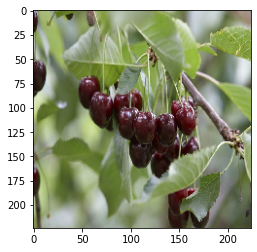

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
img = load_img(img_path, target_size=(224,224,3))
img_array = img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(img_batch)
plt.imshow(img)
#img_preprocessed

In [ ]:
prediction = new_model.predict(img_preprocessed)

In [ ]:
final_pred = [np.argmax(element) for element in prediction]
final_pred = final_pred[0]
final_pred

In [ ]:
if final_pred == 0: 
    print("Apple") 

elif final_pred == 1: 
    print("Banana") 

elif final_pred == 2: 
    print("Cherry")
elif final_pred == 3: 
    print("Dragon Fruit")
elif final_pred == 4: 
    print("Mango")
elif final_pred == 5: 
    print("Orange")
elif final_pred == 6: 
    print("Papaya")
else: 
    print("Pineapple")

Cherry
